# Profiles Samples


A set of tools to generate different types of bathymetry geometries are displayed in this notebook.


## Table of Contents

* [1. Database](#1.)
* [2. Cross-shore profile](#2.)
	* [2.1. From file](#2.1.)
	* [2.2. From Pearson et al. 2017](#2.2.)
	* [2.3. Linear profile](#2.3.)
	* [2.4. Parabolic profile](#2.4.)
	* [2.5. Biparabolic profile (Bernabeu et al. 2003)](#2.5.)
	* [2.6. Hand-made profile](#2.6.)


In [1]:
# import python libs
import sys
import os
import os.path as op
import glob

# common
import numpy as np

# dev
sys.path.insert(0, op.join(os.getcwd(),'..'))

# wswash module
from wswash.wrap import SwashProject
from wswash.plots import SwashPlot
from wswash import profiles


## 1. Database <a name="1."></a>


In [2]:
# database path
p_data = op.abspath(op.join(os.getcwd(),'..', 'data'))

# instance swash plot module
sp = SwashProject('', '')
sm = SwashPlot(sp)


## 2. Cross-shore profile types <a name="2."></a>


<span style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    Model boundaries should be far enough from the area of interest and away from steep topography to avoid unrealistic frictional or numerical dispersion effects but close enough to remain computationally feasible </span> <span style="font-family: times, Times New Roman; font-size:11pt; color:black; background:whitesmoke"> kh < 5. </span> </span> <span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> As a recommendation, the area of interest should be kept at least two wave lengths away from the boundary. In the following cells, different input choices for defining the cross-shore profile will be given. </span>
 
* `dxL`  <span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> : number of nodes per wavelength. This command sets the grid resolution from the number of nodes desired per wavelength in 1m depth (assuming that in the beach due to the infragravigity waves the water colum can reach 1m heigh). </span><br><br>

* `dxinp`: <span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> The resolution of the bathymetric grid is not the same as that of the computational grid. It is advised to avoid extremely steep bottom slopes or sharp obstacles as much as posible. </span>  

In [3]:
#sp.dxL = 30   # nº nodes per wavelength
dxinp = 1  # bathymetry x spacing resolution (m)
dyinp = 1  # bathymetry x spacing resolution (m)


### 2.1. From file <a name="2.1."></a>


<span style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    Land points are defined as negative while wet points are defined as positive.
    </span>

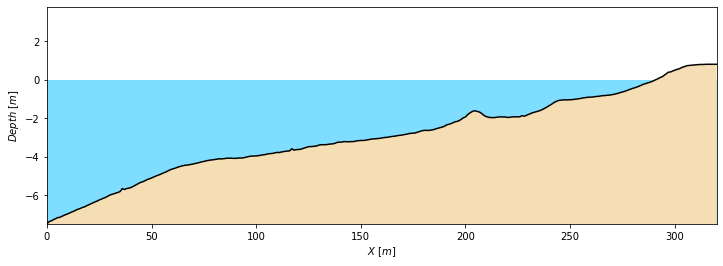

In [4]:
# load depth file
depth = np.loadtxt(op.join(p_data, 'demo', 'depth.bot'))

# set swash project depth
sp.set_depth(depth, dxinp, dyinp)

# plot profile
sm.plot_depthfile();


### 2.2. From Pearson et al. 2017 <a name="2.2."></a>


<p style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    Stuart et al. 2017 proposes an idealized reef profile morphology which could be used to predict wave transformation on reefs and subsequent flooding based on previous reef hydrodynamuc studies and sensitivity analysis. To better fit our approach, the hydrodynamic inputs have been separated from the reef morphology. The figure bellow illustrates the idealized reef profile modelled from the following representative parameters: the offshore water level (η0), fore reef slope (βf), reef flat width (Wreef), beach slope (βb), coefficient of friction (cf) and beach crest elevation (zbeach). 
</p>

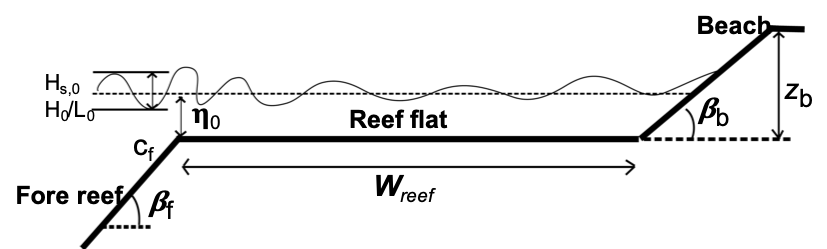

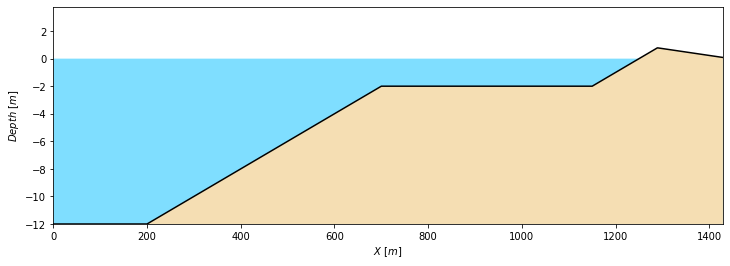

In [5]:
# generate a reef morphologic configuration as described in Pearson et al. 2017
h0 = 10        # offshore water level (m)
Slope1 =0.02   # fore reef slope
Slope2 = 0.02  # beach slope
Wreef = 450    # reef  flat width 
Wfore = 200    # length fore flume (advised 3 · L0)
bCrest = 2.8   # beach heigh (Zb)
emsl = 2       # vertical displacement from reef to msl

depth = profiles.reef(dxinp, h0, Slope1, Slope2, Wreef, Wfore, bCrest, emsl) 

# set swash project depth
sp.set_depth(depth, dxinp, dyinp)

# plot profile
sm.plot_depthfile();


### 2.3. Linear profile <a name="2.3."></a>


<p style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    
</p>

$y = mx + n$

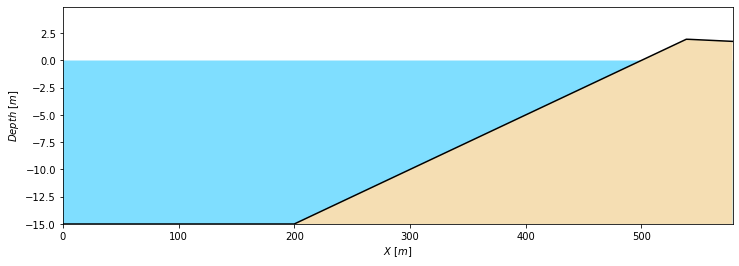

In [6]:
# define a linear shape profile
h0 = 15      # offshore water level (m)
bCrest = 2   # beach heigh (m)
m =  0.05    # beach profile slope
Wfore = 200  # length fore flume (advised 3 · L0)

depth = profiles.linear(dxinp, h0, bCrest, m, Wfore)

# set swash project depth
sp.set_depth(depth, dxinp, dyinp)

# plot profile
sm.plot_depthfile();


### 2.4. Parabolic profile <a name="2.4."></a>


<p style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    
</p>
$y = A x^{2/3}$

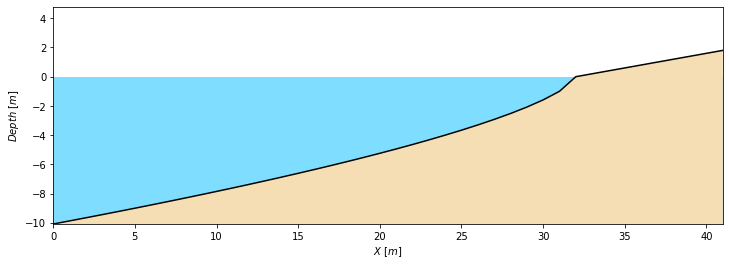

In [7]:
# define a parabolic shape profile
h0 = 10       # offshore water level (m)
A = 1         # Parabola coefficient
xBeach = 10   # Beach length (m)
bCrest = 2    # beach heigh (m)

depth = profiles.parabolic(dxinp, h0, A, xBeach, bCrest)

# set swash project depth
sp.set_depth(depth, dxinp, dyinp)

# plot profile
sm.plot_depthfile();


### 2.5. Biparabolic profile (Bernabeu et al. 2003) <a name="2.5."></a>


<p style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    Bernabeu et al. 2003 presents a morphological model based on the equilibrium beach profile that relates the beach profile morphology with hydrodynamic and sedimentological parameters. The model assumes that the main wave energy dissipation process changes along the profile, from bottom friction to turbulence dissipation. This approach integrates a formulation for two separate sections, the surf and shoaling profiles that join at the breaker point (discontinuity point).<br>
Surf profile:<br>
</p>

\begin{equation*}
x_{r} = \Bigl(\frac{h}{A}\Bigr)^{3/2}+\frac{B}{A^{3/2}} (h)^{3}
\quad\quad \text{for $0≤x≤x_{r}$}
\end{equation*}


<p style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    Shoaling profile:
    </p>
   
\begin{equation*}
X = x - x_{0} = \Bigl(\frac{h}{C}\Bigr)^{3/2}+\frac{D}{C^{3/2}} (h)^{3}
\quad\quad \text{for $0≤x≤x_{r}$}
\end{equation*}


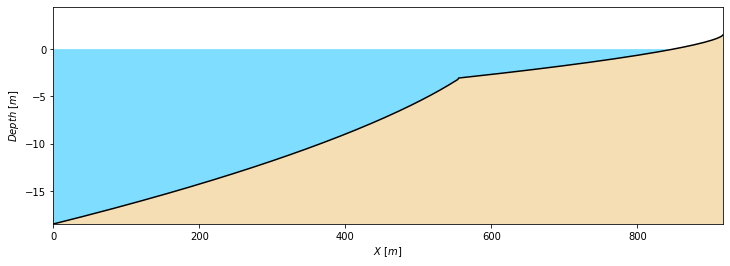

In [8]:
# define a biparabolic profile as Berbeau et al. 2003 describes
h0 = 20         # offshore water level  (m)
hs = 1.5        # significant wave heigh (m)
omega_surf = 6  # intertidal dimensionless fall velocity (1 ≤ omega_surf ≤ 5)
TR = 3          # tidal range (m)

depth = profiles.biparabolic(h0, hs, omega_surf, TR)

# set swash project depth
sp.set_depth(depth, dxinp, dyinp)

# plot profile
sm.plot_depthfile();


### 2.6. Hand made profile <a name="2.6."></a>


In [9]:
# TODO
